# Objective

 Get pose similarity of given two images using YOLOv8.<br>

 Because I have no dataset about golf posing, I'll just use COCO dataset as ultralytics given default.

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 40.2 MB/s eta 0:00:00


In [2]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yxUn0CcVG6NJkF_U1GDv-9BD-I3IltvL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yxUn0CcVG6NJkF_U1GDv-9BD-I3IltvL" -O YOLOv8_data.zip
!unzip -q YOLOv8_data.zip

--2023-06-15 02:09:48--  https://docs.google.com/uc?export=download&confirm=&id=1yxUn0CcVG6NJkF_U1GDv-9BD-I3IltvL
Resolving docs.google.com (docs.google.com)... 74.125.130.139, 74.125.130.100, 74.125.130.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.130.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/unr7i0h94u928423dgqpk8e08odvn992/1686794925000/00148754616075165078/*/1yxUn0CcVG6NJkF_U1GDv-9BD-I3IltvL?e=download&uuid=14b32f25-6ec8-4fe8-acef-0846007bcbc5 [following]
--2023-06-15 02:09:51--  https://doc-0g-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/unr7i0h94u928423dgqpk8e08odvn992/1686794925000/00148754616075165078/*/1yxUn0CcVG6NJkF_U1GDv-9BD-I3IltvL?e=download&uuid=14b32f25-6ec8-4fe8-acef-0846007bcbc5
Resolving doc-0g-04-docs.googleusercontent.com (doc-0g-04-docs.googleusercontent.com)... 74.125.130.132, 2

In [3]:
import ultralytics
from ultralytics import YOLO
import torch
import cv2
from google.colab.patches import cv2_imshow
from ultralytics.yolo.utils.plotting import Annotator
import numpy as np

ultralytics.checks()

Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.3/166.8 GB disk)


In [4]:
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [5]:
img1 = cv2.imread('Predict1.jpg')
img2 = cv2.imread('Predict2.jpg')
result1 = model.predict(source=img1, save_crop=True)
result2 = model.predict(source=img2, save_crop=True)


0: 448x640 1 person, 115.4ms
Speed: 13.8ms preprocess, 115.4ms inference, 31.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

0: 448x640 1 person, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


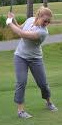

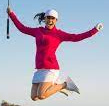

In [6]:
img1 = cv2.imread('/content/runs/detect/predict/crops/person/image0.jpg')
img2 = cv2.imread('/content/runs/detect/predict/crops/person/image02.jpg')
cv2_imshow(img1)
cv2_imshow(img2)

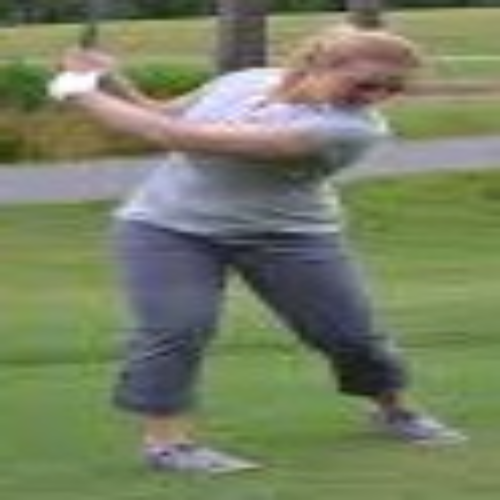

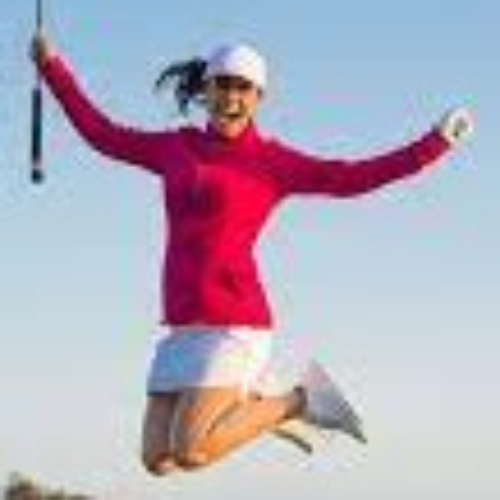

In [7]:
img1 = cv2.resize(img1, (500, 500))
img2 = cv2.resize(img2, (500, 500))
cv2_imshow(img1)
cv2_imshow(img2)

In [8]:
model = YOLO('yolov8n-pose.yaml')
model = YOLO('yolov8n-pose.pt')

result1 = model.predict(source=img1)
result2 = model.predict(source=img2)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [9]:
def get_keypoints(result):
  keypoints = []

  for i in range(len(result[0].keypoints.xy[0])):
    x = int(result[0].keypoints.xy[0][i][0].item())
    y = int(result[0].keypoints.xy[0][i][1].item())

    keypoints.append((x,y))
  return keypoints


In [10]:
def draw_keypoints(keypoints, img):
  point_connections = [[0,1], [0,2], [2,4], [1,3], [3,5], [4,6], [6,12], [6,5], [5,11], [6,8], [8,10], [5,7], [7,9], [12,14], [14,16], [11,13], [13,15]]
  for i, (x, y) in enumerate(keypoints):
    cv2.circle(img, (x, y), 5, (0, 255, 0), thickness=-1)
    cv2.putText(img, str(i), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0))

  for connection in point_connections:
    partA = connection[0]
    partB = connection[1]

    if keypoints[partA] and keypoints[partB]:
      cv2.line(img, keypoints[partA], keypoints[partB], (255,0,0))
  return img

In [11]:
keypoints1 = get_keypoints(result1)
keypoints2 = get_keypoints(result2)

img1 = draw_keypoints(keypoints1, img1)
img2 = draw_keypoints(keypoints2, img2)

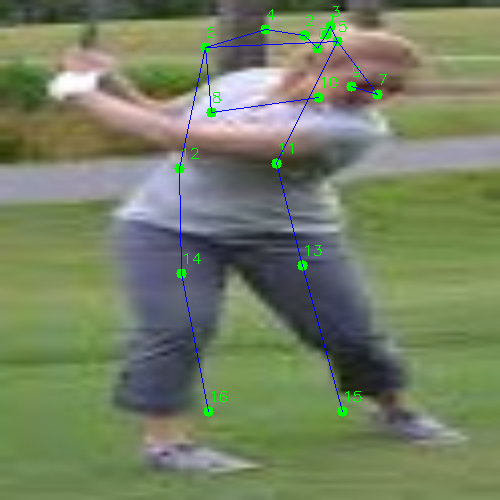

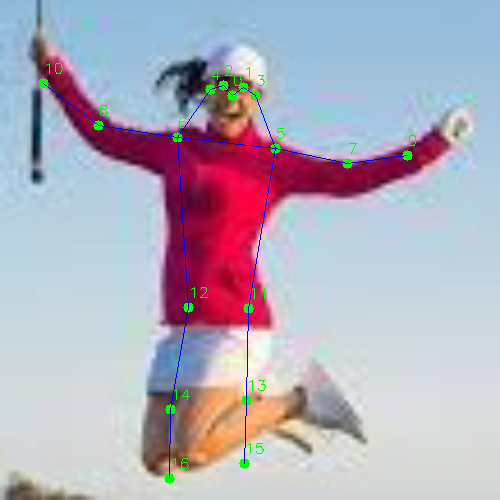

In [12]:
cv2_imshow(img1)
cv2_imshow(img2)

# Cosine Similarity

While the cosine similarity equation computes the likeness in orientation between two vectors, by calculating the cosine of the angle between them using the cosine.

The formula of cosine similarity is:

![image](https://github.com/csh970605/csh970605.github.io/assets/28240052/fbceece8-2e93-4510-830a-b661297bed6b)

In [13]:
def get_cosine_similarity(x1, y1, x2, y2):
  origin = np.array((0,0))
  a = np.array((x1,y1))
  b = np.array((x2,y2))

  dot = np.dot(a, b)
  a_distance = np.linalg.norm(origin-a)
  b_distance = np.linalg.norm(origin-b)

  cos_similarity = dot/(a_distance*b_distance)


  return cos_similarity


In [14]:
cos_similarities = []

for ((x1,y1), (x2,y2)) in zip(keypoints1, keypoints2):
  cos_similarities.append(get_cosine_similarity(x1, y1, x2, y2))

cos_similarities = np.array(cos_similarities)
cos_similarity = np.mean(cos_similarities)
print('The Cosine Similarity between two images : ', cos_similarity)

The Cosine Similarity between two images :  0.9449755767531258


# OKS similarity

The Flow-based Pose similarity algorithm uses Object Keypoint Similarity (OKS) between two human poses to compare the distance between the corresponding body joints.<br>

The formula of OKS similarity is:

![image](https://github.com/csh970605/csh970605.github.io/assets/28240052/53ca51a9-fdcd-41aa-ba76-2e903ed09d03)

In [15]:
def get_OKS_similarity(x1, y1, x2, y2, visibility=1):

  a = np.array((x1,y1))
  b = np.array((x2,y2))

  KAPPA = np.array([1] * len(a))
  SCALE = 1.0

  distances = np.linalg.norm(b - a, axis=-1)
  exp_vector = np.exp(-(distances**2) / (2 * (SCALE**2) * (KAPPA**2)))
  numerator = np.dot(exp_vector, int(visibility))
  denominator = np.sum(int(visibility))
  return numerator / denominator

In [16]:
OKS_similarities = []

for ((x1,y1), (x2,y2)) in zip(keypoints1, keypoints2):
  OKS_similarities.append(get_OKS_similarity(x1, y1, x2, y2))

OKS_similarities = np.array(OKS_similarities)
OKS_similarities = np.mean(OKS_similarities)
print('The OKS Similarity between two images : ', OKS_similarities)

The OKS Similarity between two images :  0.0
